<a href="https://colab.research.google.com/github/adarsh-meher/Kaggle---Predict-Real-disaster-tweets/blob/master/Kaggle_Real_or_not_Disaster_Tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/adarsh-meher/Kaggle---Predict-Real-disaster-tweets.git
import os
os.chdir('/content/Kaggle---Predict-Real-disaster-tweets/')

Cloning into 'Kaggle---Predict-Real-disaster-tweets'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [6]:
os.listdir(os.getcwd())

['README.md',
 'sample_submission.csv',
 'Kaggle---Predict-Real-disaster-tweets',
 '.git',
 'Kaggle_Real_or_not_Disaster_Tweet.ipynb',
 'test.csv',
 'train.csv']

In [7]:
!pip install fasttext
!pip install fastai
!pip install wordcloud
!pip install transformers

     |████████████████████████████████| 61kB 4.6MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.1-cp36-cp36m-linux_x86_64.whl size=2385493 sha256=d4436a58c1120d9d87d87e2e84162d509ee345799db454b016575591fa571ac8
  Stored in directory: /root/.cache/pip/wheels/9f/f0/04/caa82c912aee89ce76358ff954f3f0729b7577c8ff23a292e3
Successfully built fasttext


In [0]:
import pandas as pd
import numpy as np
import dask as D
import scipy as sc
import spacy as S
import gensim as G
import torch as T
import fasttext as ft
import fastai as fai
import hyperopt as hopt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import  WordCloud, STOPWORDS , ImageColorGenerator
import nltk
from tqdm import tqdm

In [0]:
#### List of contractions
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I shall",
"I'll've": "I shall have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it has",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she shall",
"she'll've": "she shall have",
"she's": "she has",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there has",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they shall",
"they'll've": "they shall have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "what has",
"what've": "what have",
"when's": "when has",
"when've": "when have",
"where'd": "where did",
"where's": "where has",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you shall",
"you'll've": "you shall have",
"you're": "you are",
"you've": "you have"
}

In [0]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [11]:
train_data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [0]:
train_data.set_index(['id'],inplace=True)
train_data.drop_duplicates(inplace = True)
train_data.reset_index(inplace= True)

test_data.set_index(['id'],inplace=True)
test_data.drop_duplicates(inplace = True)
test_data.reset_index(inplace= True)

# **EDA and Text Analysis**

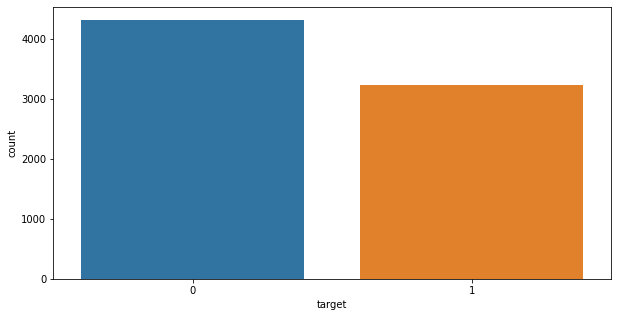

In [13]:
##### Distribution of 1/0 in train

plt.figure(figsize = (10,5))
sb.countplot(x = 'target',data = train_data)
plt.show()

### No imbalance in target distribution.

In [0]:
##### Train data summary
def data_summary(data):
  df1 = pd.DataFrame(columns = ['Column name','NA Present','Number of Uniques Except NA','Most Common Category','Least Common Category'],index = range(data.shape[1]))
  for i,c in enumerate(data.columns.tolist()):
    df1.loc[i,'Column name'] = c
    df1.loc[i,'NA Present'] = data[pd.isna(data[c])].shape[0]
    df1.loc[i,'Number of Uniques Except NA'] = data[~pd.isna(data[c])][c].nunique()
    df1.loc[i,'Least Common Category'] = data[~pd.isna(data[c])][c].value_counts().argmin()
    df1.loc[i,'Most Common Category'] = data[~pd.isna(data[c])][c].value_counts().argmax()
  return df1


In [15]:
data_summary(train_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


,Column name,NA Present,Number of Uniques Except NA,Most Common Category,Least Common Category
0,id,0,7561,2047,2047
1,keyword,61,221,fatalities,radiation%20emergency
2,location,2500,3341,USA,front row at a show
3,text,0,7503,11-Year-Old Boy Charged With Manslaughter of T...,People who say it cannot be done should not in...
4,target,0,2,0,1


In [16]:
data_summary(test_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


,Column name,NA Present,Number of Uniques Except NA,Most Common Category,Least Common Category
0,id,0,3252,10235,10235
1,keyword,26,221,deluged,epicentre
2,location,1100,1602,New York,| INDIA |
3,text,0,3243,11-Year-Old Boy Charged With Manslaughter of T...,@magicallester I will die. I'm actually being ...


In [17]:
#### counts of texts to check duplicate texts. We can then look at other attributes of duplicate texts to see what they differ in.
train_data['text'].value_counts().sort_values(ascending = False)

11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...         5
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                      3
that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time                3
#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption                            3
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM                                                                                     3
                                                                                                                                                ..
The ol' meltdown victory for the Mets.                                                                                

In [18]:
#### look into some of repeated texts and see their other attributes
t1 = train_data['text'].value_counts()
repeated_tweets = t1[t1>1].index.values.tolist()
print("Number of repeated tweets : %s" % (len(repeated_tweets)))
t2 = train_data[train_data['text'].isin(repeated_tweets)]
t2

#### We can see that for some texts the target is same but they differ in location. For others we have different target values for same text.

Number of repeated tweets : 48


,id,keyword,location,text,target
606,881,bioterrorism,NaN,To fight bioterrorism sir.,1
620,898,bioterrorism,NaN,To fight bioterrorism sir.,0
1128,1634,bombing,NaN,Japan on Thursday marks the 70th anniversary o...,1
1150,1665,bombing,Singapore,Japan on Thursday marks the 70th anniversary o...,1
1166,1689,bridge%20collapse,"Mumbai , India",Warne shocked over Australia's epic collapse a...,1
...,...,...,...,...,...
7548,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt:...,1
7555,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1
7557,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7558,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


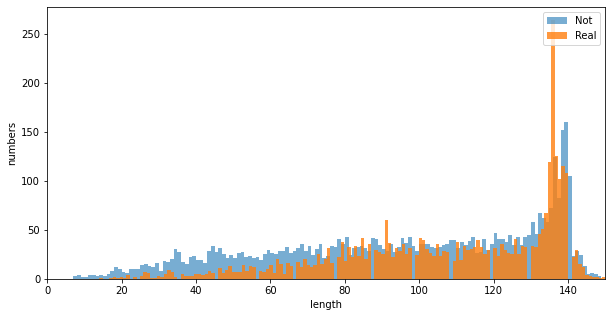

In [19]:
##### Number of characters in tweet

train_data['len_char'] = train_data['text'].apply(lambda x : len(x))
test_data['len_char'] = test_data['text'].apply(lambda x : len(x))

plt.figure(figsize = (10,5))
bins = 150
plt.hist(train_data[train_data['target'] == 0]['len_char'], alpha = 0.6, bins=bins, label='Not')
plt.hist(train_data[train_data['target'] == 1]['len_char'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.show()


##### The distribution of length of chars is approximately similar

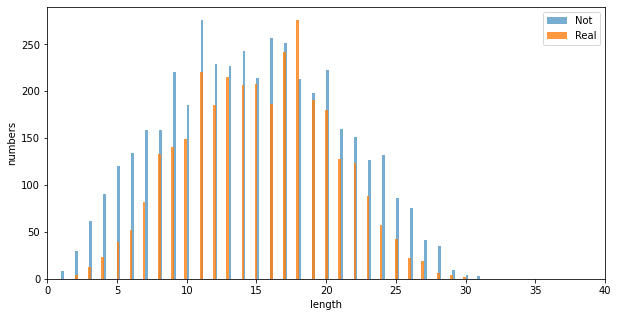

In [20]:
##### Analyzing distribution of number of words in 1/0 tweets

train_data['num_words'] = train_data['text'].apply(lambda x : len(x.split()))
test_data['num_words'] = test_data['text'].apply(lambda x : len(x.split()))

plt.figure(figsize = (10,5))
plt.hist(train_data[train_data['target'] == 0]['num_words'], alpha = 0.6, bins=bins, label='Not')
plt.hist(train_data[train_data['target'] == 1]['num_words'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,40)
plt.show()

#### The distribution is approximately similar

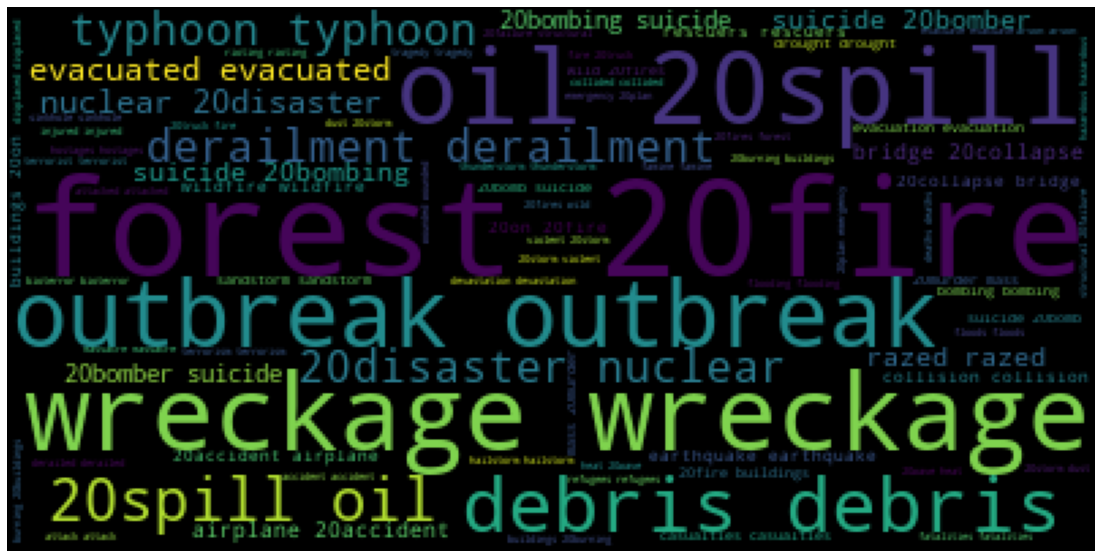

In [21]:
#### Wordcloud of keywords for trget distribution
keywords_1 = train_data[(train_data['target'] == 1) & (~pd.isna(train_data['keyword']))]['keyword'].values.tolist()
keywords_0 = train_data[(train_data['target'] == 0) & (~pd.isna(train_data['keyword']))]['keyword'].values.tolist()


#### Wordcloud for keywords belonging to target 1
plt.figure(figsize=(20,10))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(keywords_1))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()


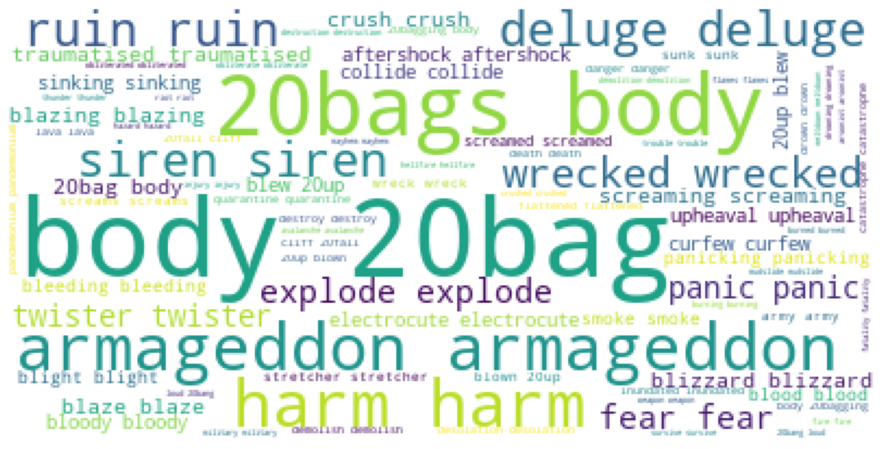

In [22]:
#### Wordcloud of keywords belonging to target 0
plt.figure(figsize=(20,8))
word_cloud = WordCloud(
                          background_color='white',
                          max_font_size = 50
                         ).generate(" ".join(keywords_0))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()


# **Feature Engineering and text cleaning**

In [23]:
##### Removing stopwords, punctuations and extracting hashtags,@ and http texts.
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.probability import FreqDist
from string import punctuation

nltk.download("stopwords")
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words("english"))
ps = PorterStemmer()
wnl = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:

import re
import string
nlp = S.load("en_core_web_sm")

text_with_postag = {}
text_with_depparse = {}
text_with_ner = {}

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def cleaning_tweet(x):
  
  ####removing emojis
  x = remove_emoji(x)
  url = re.compile(r'https?://\S+|www\.\S+')
  html=re.compile(r'<.*?>')

  x = url.sub(r'',x)
  x = html.sub(r'',x)

  ### extract contractions
  x1 = [ contractions[j] if j in list(contractions.keys()) else j for i in sent_tokenize(x) for j in word_tokenize(i)  ]
  
  ### removing stopwords
  x2 = [ i for i in x1 if i not in stop_words]
  
  ### removing punctuations
  x3  = " ".join([w for w in x2  if w not in string.punctuation])
  x4 = re.sub('[0-9]+', '', x3)
  
  doc = nlp(x4)
  
  ### clean text
  clean_text = [ token.lemma_.lower() for token in doc if token.lemma_.lower() not in string.punctuation ]
  
  return clean_text

In [0]:
train_data['flag'] = ['train']*train_data.shape[0]
test_data['flag'] = ['test']*test_data.shape[0]
total_data = pd.concat([train_data.drop(['target'],axis = 1),test_data],axis = 0)

In [0]:
total_data['clean_text'] = total_data['text'].apply(lambda u : cleaning_tweet(u))

In [0]:
target = train_data['target']

In [0]:
total_data['digit_pres'] = total_data['text'].apply(lambda x : 1 if len(re.findall('[0-9]+',x))>0 else 0)
url = re.compile(r'https?://\S+|www\.\S+')
html=re.compile(r'<.*?>')
total_data['html_link_pres'] = total_data['text'].apply(lambda x : 1 if len(html.findall(x))>0 else 0)     ### removing html
total_data['url_pres'] = total_data['text'].apply(lambda x : 1 if len(url.findall(x))>0 else 0)    ### removing url

In [0]:
def key_vars(x,key,return_pos = True):
  if pd.isna(key):
    if return_pos:
      return -1
    else:
      return 0
  else:
    pos_of_keyword = list(x.split()).index(key)/len(list(x.split())) if key in list(x.split()) else 0
    num_occur_key = sum([1 if j==key  else 0 for j in list(x.split()) ])
    if return_pos:
      return pos_of_keyword
    else:
      return num_occur_key

total_data['pos_of_keyword'] = total_data[['text','keyword']].apply(lambda x : key_vars(x[0],x[1]),axis = 1)     ### removing html
total_data['num_occur_key'] = total_data[['text','keyword']].apply(lambda x : key_vars(x[0],x[1],return_pos=False),axis = 1)    ### removing url

In [0]:
total_data['text_with_postag'] = total_data['clean_text'].apply(lambda x : [ '/'.join(list(i)) for i in [ (token.text,token.pos_) for token in nlp(' '.join(x))] ])

In [0]:
total_data['text_with_depparse'] = total_data['clean_text'].apply(lambda x : [ '/'.join(list(i)) for i in [ (token.text,token.dep_) for token in nlp(' '.join(x))] ])

In [0]:
total_data['text_with_ner'] = total_data['clean_text'].apply(lambda x : [ '/'.join(list(i)) for i in [ (token.text,token.label_) for token in nlp(' '.join(x)).ents] ])

In [0]:
##### Final train/test data.
train_data = total_data[total_data['flag'] == 'train']
test_data = total_data[total_data['flag'] == 'test']

# **Splitting train into train/validation**

In [76]:
train_data['clean_text_joined'] = train_data['clean_text'].apply(lambda x : ' '.join([ i for i in x if i != '-pron-' ]))
test_data['clean_text_joined'] = test_data['clean_text'].apply(lambda x : ' '.join([ i for i in x if i != '-pron-' ]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
train_data.head()

,id,keyword,location,text,len_char,num_words,flag,clean_text,digit_pres,html_link_pres,url_pres,pos_of_keyword,num_occur_key,text_with_postag,text_with_depparse,text_with_ner,clean_text_joined
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,train,"[-pron-, deeds, reason, earthquake, may, allah...",0,0,0,-1.0,0,"[-pron-/PROPN, deeds/PROPN, reason/PROPN, eart...","[-pron-/compound, deeds/compound, reason/compo...",[],deeds reason earthquake may allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,train,"[forest, fire, near, la, ronge, sask, canada]",0,0,0,-1.0,0,"[forest/NOUN, fire/NOUN, near/SCONJ, la/PROPN,...","[forest/compound, fire/nsubj, near/prep, la/co...",[la ronge sask canada/FAC],forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,train,"[all, resident, ask, shelter, place, notify, o...",0,0,0,-1.0,0,"[all/DET, resident/NOUN, ask/VERB, shelter/PRO...","[all/det, resident/compound, ask/compound, she...",[],all resident ask shelter place notify officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,train,"[people, receive, wildfire, evacuation, order,...",1,0,0,-1.0,0,"[people/NOUN, receive/VERB, wildfire/NOUN, eva...","[people/nsubj, receive/ROOT, wildfire/compound...",[california/GPE],people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,train,"[just, get, send, photo, ruby, alaska, smoke, ...",0,0,0,-1.0,0,"[just/ADV, get/AUX, send/VERB, photo/NOUN, rub...","[just/advmod, get/aux, send/ROOT, photo/compou...",[alaska/GPE],just get send photo ruby alaska smoke wildfire...


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(train_data['clean_text_joined'],target,test_size = 0.25)
x_train = pd.DataFrame(x_train)
x_train.rename(columns = {'clean_text_joined' : 'text'},inplace = True)
x_val = pd.DataFrame(x_val)
x_val.rename(columns = {'clean_text_joined' : 'text'},inplace = True)

# **BERT Model with Pytorch**

In [0]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove*.zip

In [38]:
!wget  https://storage.googleapis.com/bert_models/2018_10_18/cased_L-12_H-768_A-12.zip
!unzip cased_L-12_H-768_A-12.zip

--2020-03-23 13:53:13--  https://storage.googleapis.com/bert_models/2018_10_18/cased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404261442 (386M) [application/zip]
Saving to: ‘cased_L-12_H-768_A-12.zip’

cased_L-12_H-768_A- 100%[===================>] 385.53M  86.6MB/s    in 4.7s    

2020-03-23 13:53:18 (82.0 MB/s) - ‘cased_L-12_H-768_A-12.zip’ saved [404261442/404261442]

Archive:  cased_L-12_H-768_A-12.zip
   creating: cased_L-12_H-768_A-12/
  inflating: cased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: cased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: cased_L-12_H-768_A-12/vocab.txt  
  inflating: cased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: cased_L-12_H-768_A-12/bert_config.json  


In [0]:
os.rename('cased_L-12_H-768_A-12','bert-base-uncased')

In [0]:
import transformers 
import torch.nn as nn 
import torch
from tqdm import tqdm
from sklearn import metrics
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

In [41]:
MAX_Len = 300
TRAIN_BATCH_SIZE =10
VALID_BATCH_SIZE = 5
BERT_PATH = 'bert-base-uncased'
TOKENZIER = transformers.BertTokenizer.from_pretrained(BERT_PATH,do_lower_case = True )

In [0]:
class Bert(nn.Module):
  def __init__(self):
    super(Bert,self).__init__()
    self.bert = transformers.BertModel.from_pretrained(BERT_PATH)
    self.bert_drop = nn.Dropout(0.4)
    self.out = nn.Linear(768,1)

  def forward(self,ids,mask,token_type_ids) : 
        out1,out2 = self.bert( 
            ids , 
            attention_mask = mask , 
            token_type_ids = token_type_ids 
        )
        drop = self.bert_drop(out2) 
        output = self.out(drop) 
        return output  

In [0]:
class BERTData : 
    def __init__(self,df) : 
        
        self.text = df['text'].values
        self.target = df['target'].values 
        self.tokenizer = TOKENZIER 
        self.max_len = MAX_Len 
    def __len__(self) : 
        return len(self.text) 
    def __getitem__(self, item):
        text = str(self.text[item])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
                text,
                None,
                add_special_tokens=True,
                max_length=self.max_len
            )

        ids = inputs["input_ids"]
        mask = inputs["attention_mask"]
        token_type_ids = inputs["token_type_ids"]

        padding_length = self.max_len - len(ids)
        ids = ids + ([0] * padding_length)
        mask = mask + ([0] * padding_length)
        token_type_ids = token_type_ids + ([0] * padding_length)

        return {
                'ids': torch.tensor(ids, dtype=torch.long),
                'mask': torch.tensor(mask, dtype=torch.long),
                'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
                'targets': torch.tensor(self.target[item], dtype=torch.float)
            }

In [0]:
def loss_fn(outputs, targets):
    return nn.BCEWithLogitsLoss()(outputs, targets.view(-1, 1))


In [0]:
def train_fn(data_loader, model, optimizer, scheduler):
    model.train()

    for bi, d in tqdm(enumerate(data_loader), total=len(data_loader)):
        ids = d["ids"]
        token_type_ids = d["token_type_ids"]
        mask = d["mask"]
        targets = d["targets"]

        ids = ids.to(device, dtype=torch.long)
        token_type_ids = token_type_ids.to(device, dtype=torch.long)
        mask = mask.to(device, dtype=torch.long)
        targets = targets.to(device, dtype=torch.float)

        optimizer.zero_grad()
        outputs = model(
            ids=ids,
            mask=mask,
            token_type_ids=token_type_ids
        )

        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
       

In [0]:
 def eval_fn(data_loader, model):
    model.eval()
    fin_targets = []
    fin_outputs = []
    with torch.no_grad():
        for bi, d in tqdm(enumerate(data_loader), total=len(data_loader)):
            ids = d["ids"]
            token_type_ids = d["token_type_ids"]
            mask = d["mask"]
            targets = d["targets"]

            ids = ids.to(device, dtype=torch.long)
            token_type_ids = token_type_ids.to(device, dtype=torch.long)
            mask = mask.to(device, dtype=torch.long)
            targets = targets.to(device, dtype=torch.float)

            outputs = model(
                ids=ids,
                mask=mask,
                token_type_ids=token_type_ids
            )
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [0]:
DEVICE =torch.device("cuda")
device = torch.device("cuda")
def run(model,EPOCHS):

    train_dataset = BERTData(
        pd.concat([x_train,y_train],axis = 1)
    )

    train_data_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=TRAIN_BATCH_SIZE,
        num_workers=4
    )

    valid_dataset = BERTData(
        pd.concat([x_val,y_val],axis = 1)

    )

    valid_data_loader = torch.utils.data.DataLoader(
        valid_dataset,
        batch_size=VALID_BATCH_SIZE,
        num_workers=1
    )

    device = torch.device("cuda")
    
    
    param_optimizer = list(model.named_parameters())
    no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
    optimizer_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.001},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0},
    ]

    num_train_steps = int(len(train_data_loader)) * EPOCHS
    optimizer = AdamW(optimizer_parameters, lr=1e-5)
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=num_train_steps
    )


    model = nn.DataParallel(model)

    best_accuracy = 0
    for epoch in range(EPOCHS):
        train_fn(train_data_loader, model, optimizer, scheduler)
        outputs, targets = eval_fn(valid_data_loader, model)
        outputs = np.array(outputs) >= 0.5
        accuracy = metrics.accuracy_score(targets, outputs)
        print(f"Accuracy Score = {accuracy}")
        scheduler.step()

In [103]:
model = Bert()
model.to(device)
getattr(tqdm, '_instances', {}).clear()
run(model,1)

100%|██████████| 379/379 [00:37<00:00, 10.20it/s]

Accuracy Score = 0.8212585933368588


In [0]:
def sentence_prediction(sentence):
    tokenizer = TOKENZIER
    max_len = MAX_Len
    text = str(sentence)
    text = " ".join(text.split())

    inputs = tokenizer.encode_plus(
        text,
        None,
        add_special_tokens=True,
        max_length=max_len
    )

    ids = inputs["input_ids"]
    mask = inputs["attention_mask"]
    token_type_ids = inputs["token_type_ids"]

    padding_length = max_len - len(ids)
    ids = ids + ([0] * padding_length)
    mask = mask + ([0] * padding_length)
    token_type_ids = token_type_ids + ([0] * padding_length)

    ids = torch.tensor(ids, dtype=torch.long).unsqueeze(0)
    mask = torch.tensor(mask, dtype=torch.long).unsqueeze(0)
    token_type_ids = torch.tensor(token_type_ids, dtype=torch.long).unsqueeze(0)

    ids = ids.to(DEVICE, dtype=torch.long)
    token_type_ids = token_type_ids.to(DEVICE, dtype=torch.long)
    mask = mask.to(DEVICE, dtype=torch.long)

    outputs = model(
        ids=ids,
        mask=mask,
        token_type_ids=token_type_ids
    )

    outputs = torch.sigmoid(outputs).cpu().detach().numpy()
    return outputs[0][0]

In [107]:
test_data['target'] = test_data['clean_text_joined'].apply(sentence_prediction)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
sub = test_data[['id','target']]
sub['target'] = sub['target'].round().astype('int')
sub.to_csv('submission.csv',index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
